![A Cloud Guru](acg_logo.png)
<hr/>

<center><h1>Perform Feature Engineering Using Amazon SageMaker</h1></center>

# Introduction

In this lab, you will learn how to perform various preprocessing tasks like encoding, scaling and data binning. The provided dataset contains a list of employees with their job title, age, salary and the department and contains both numerical and text data.

# How to Use This Lab

Most of the code is provided for you in this lab as our solution to the tasks presented. Some of the cells are left empty with a #TODO header and its your turn to fill in the empty code. You can always use our lab guide if you are stuck.

# 1) Import the Libraries

# 2)Read the data

In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

employee_df = pd.read_csv('Employee_encoding.csv')
employee_df.head()

,employee_id,first_name,last_name,age,gender,department,salary,title
0,1,John,Doe,35,Male,Marketing,50000,developer
1,2,Jane,Smith,28,Female,Sales,60000,senior developer
2,3,Michael,Johnson,42,Male,Finance,70000,manager
3,4,Emily,Williams,31,Female,HR,55000,vp
4,5,James,Brown,37,Male,Operations,65000,developer


In [24]:
ordinal_encoder = OrdinalEncoder()
employee_df['title'].unique()

array(['developer', 'senior developer', 'manager', 'vp'], dtype=object)

In [25]:
ordinal_encoder.fit(employee_df['title'].values.reshape(-1,1))

OrdinalEncoder()

In [26]:
ordinal_encoder.categories_

[array(['developer', 'manager', 'senior developer', 'vp'], dtype=object)]

In [31]:
ordinal_encoder.categories_ = [['developer','senior developer','manager','vp']]


In [32]:
employee_df['encoded_title'] = ordinal_encoder.transform(employee_df['title'].values.reshape(-1,1))

In [33]:
employee_df['encoded_title'].unique()

array([0., 1., 2., 3.])

In [38]:
employee_df = employee_df.drop(columns=['title'])
employee_df.head()

,employee_id,first_name,last_name,age,gender,department,salary,encoded_title
0,1,John,Doe,35,Male,Marketing,50000,0.0
1,2,Jane,Smith,28,Female,Sales,60000,1.0
2,3,Michael,Johnson,42,Male,Finance,70000,2.0
3,4,Emily,Williams,31,Female,HR,55000,3.0
4,5,James,Brown,37,Male,Operations,65000,0.0


In [39]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler(clip=True)

In [40]:
mmscaler.fit(employee_df['salary'].values.reshape(-1,1),)
employee_df['salary_minmax_scaled'] = mmscaler.transform(employee_df['salary'].values.reshape(-1,1))

In [42]:
employee_df[['salary_minmax_scaled']].describe()

,salary_minmax_scaled
count,100.000000
mean,0.388537
std,0.229024
min,0.000000
25%,0.219512
50%,0.347561
75%,0.521341
max,1.000000


In [41]:
employee_df.head()

,employee_id,first_name,last_name,age,gender,department,salary,encoded_title,salary_minmax_scaled
0,1,John,Doe,35,Male,Marketing,50000,0.0,0.000000
1,2,Jane,Smith,28,Female,Sales,60000,1.0,0.121951
2,3,Michael,Johnson,42,Male,Finance,70000,2.0,0.243902
3,4,Emily,Williams,31,Female,HR,55000,3.0,0.060976
4,5,James,Brown,37,Male,Operations,65000,0.0,0.182927


In [44]:
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt

In [59]:
kbins = KBinsDiscretizer(n_bins=10, strategy='quantile', encode='ordinal')

In [60]:
employee_df['age_bin'] = kbins.fit_transform(employee_df['age'].values.reshape(-1,1))


(array([ 8.,  5.,  9., 15., 13.,  4., 11., 15.,  8., 12.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

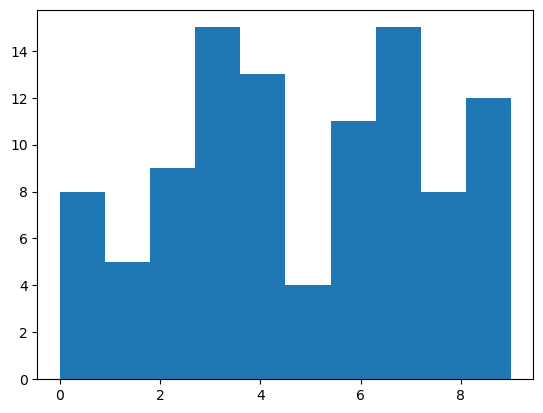

In [61]:
plt.hist(employee_df['age_bin'])

In [62]:
employee_df.head()

,employee_id,first_name,last_name,age,gender,department,salary,encoded_title,salary_minmax_scaled,age_bin
0,1,John,Doe,35,Male,Marketing,50000,0.0,0.000000,7.0
1,2,Jane,Smith,28,Female,Sales,60000,1.0,0.121951,2.0
2,3,Michael,Johnson,42,Male,Finance,70000,2.0,0.243902,9.0
3,4,Emily,Williams,31,Female,HR,55000,3.0,0.060976,4.0
4,5,James,Brown,37,Male,Operations,65000,0.0,0.182927,9.0


In [63]:
employee_df['department'].unique()

array(['Marketing', 'Sales', 'Finance', 'HR', 'Operations', 'IT'],
      dtype=object)

In [64]:
from sklearn.preprocessing import OneHotEncoder
gender_encoder = OneHotEncoder()
employee_df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [67]:
transform = gender_encoder.fit_transform(employee_df['gender'].values.reshape(-1,1))

In [69]:
employee_df1 = pd.DataFrame(transform.todense(), columns=gender_encoder.categories_)

In [70]:
employee_df = employee_df.join(employee_df1)

In [71]:
employee_df.head()

,employee_id,first_name,last_name,age,gender,department,salary,encoded_title,salary_minmax_scaled,age_bin,"(Female,)","(Male,)"
0,1,John,Doe,35,Male,Marketing,50000,0.0,0.000000,7.0,0.0,1.0
1,2,Jane,Smith,28,Female,Sales,60000,1.0,0.121951,2.0,1.0,0.0
2,3,Michael,Johnson,42,Male,Finance,70000,2.0,0.243902,9.0,0.0,1.0
3,4,Emily,Williams,31,Female,HR,55000,3.0,0.060976,4.0,1.0,0.0
4,5,James,Brown,37,Male,Operations,65000,0.0,0.182927,9.0,0.0,1.0


In [72]:
from sklearn.preprocessing import LabelEncoder
department_encoder = LabelEncoder()
employee_df['department'].unique()

array(['Marketing', 'Sales', 'Finance', 'HR', 'Operations', 'IT'],
      dtype=object)

In [73]:
employee_df['encoded_department'] = department_encoder.fit_transform(employee_df['department'])

In [76]:
department_encoder.classes_

array(['Finance', 'HR', 'IT', 'Marketing', 'Operations', 'Sales'],
      dtype=object)

In [74]:
employee_df.head()

,employee_id,first_name,last_name,age,gender,department,salary,encoded_title,salary_minmax_scaled,age_bin,"(Female,)","(Male,)",encoded_department
0,1,John,Doe,35,Male,Marketing,50000,0.0,0.000000,7.0,0.0,1.0,3
1,2,Jane,Smith,28,Female,Sales,60000,1.0,0.121951,2.0,1.0,0.0,5
2,3,Michael,Johnson,42,Male,Finance,70000,2.0,0.243902,9.0,0.0,1.0,0
3,4,Emily,Williams,31,Female,HR,55000,3.0,0.060976,4.0,1.0,0.0,1
4,5,James,Brown,37,Male,Operations,65000,0.0,0.182927,9.0,0.0,1.0,4
